# COGS 108 - Final Project


## Permissions
Place an X in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that PIDs will be scraped from the public submission, but student names will be included.)

[X] YES - make available

[ ] NO - keep private


# Overview

Our project explores the rent prices in San Diego with the introduction of Airbnb in the City. After comparing the rent price and Airbnb price in the years of 2014 to 2017, we want to then analyze this finding and compare to rent prices prior to 2014 as well.


# Names

* John Kim

* Oscar Reyes

* Hae-Chan Grace Kim

* Edgar Matias

* Aaron Hernandez


# Group Members IDs

* A13592794
* A13664593
* A13937393
* A15702345
* A12623880


# Research Question
 
How does having an Airbnb affect the prices of surrounding rentals? Does it devalue or overprice the rental price?


# Background and Prior Work

As avid Airbnb users, we realized that using this service is more appealing to our demographic as students. When looking for places to stay, we tend to open up Airbnb rather than using other third-party apps or services that offer stays such as Hotels.com or Booking.com. We began to wonder why this is the case and wanted to look into the impact it can bring on the price of the general renting market in a specific city (1). What makes this topic interesting is the fact that Airbnb offers services such as short-term and long-term stays which can almost replace the traditional renting space options such as month to month rent or hotel options. Oftentimes Airbnb’s are preferred for long-term stays since the consumer has access to a place equipped with a better living situation with perks such as a kitchen, a TV, and generally more spacious rooms. In regards to our hypothesis, we wanted to look at the positive or negative impact Airbnb can bring in a city in regards to rent prices. We were able to come up with this by looking at articles and publishings that attribute to the impact on hotel price strategy (2). This allows us to critically analyze and find patterns Airbnb introduces in the market of renting a space.
 
The topic and our dataset would be important to stakeholders such as renters and landlords. We also want to see the significance of how San Diego state bill was passed and its attribution to the importance of people living and coming to rent in this city (3). To help aid our direction for this topic by looking at two case studies where one looks into hotel vs Airbnb prices, while the other explains the impact Airbnb brings into the housing market. The study focusing on prices between hotel and Airbnb concluded that “Hotels more centrally located show more fierce competition with their Airbnb neighbors, with less central hotels less affected (4).” This highlights an interesting dynamic Airbnb brings into the market of rental spaces. Additionally, the other case study makes a statement about how there is a trend for absentee landlords to move their long-term rent to short-term rent (5).
 
References:
https://www.smartcitiesdive.com/ex/sustainablecitiescollective/airbnb-phenomenon-what-s-impact-cities/294081/

https://www.phocuswire.com/airbnb-versus-hotels-pricing-strategy

https://www.sandiegouniontribune.com/business/tourism/story/2019-05-23/state-bill-clamping-down-on-airbnb-rentals-in-san-diego-clears-major-hurdle-in-state-assembly

https://nycdatascience.com/blog/student-works/web-scraping/hotels-vs-airbnb-barcelona-case-study-proof-of-concept/

https://hbr.org/2019/04/research-when-airbnb-listings-in-a-city-increase-so-do-rent-prices


# Hypothesis

We think that having an Airbnb in the neighborhood will have a positive effect (from the perspective of the renters) which will reduce the price of surrounding rentals. Since Airbnb can be competitive and take away business then we think it will make the landlords lower they’re prices to compete with Airbnb.


# Dataset(s)

* Dataset Name: ?
* Link to the dataset: ?
* Number of observations: This dataset contains ? rows and ? columns.


decription of where the dataset was from and how it will be important, also talk about some column names and what it corresponds to

* Dataset Name: Zillow Rent data
* Link to the dataset: https://www.zillow.com/research/data/
* Number of observations: This dataset contains 9239 rows and 119 columns.


This data is form Zillow's housing data which has rent dataset ranging monthly from 2010 to 2020. There are multiple cities and rent prices according to their geolocation. 


# Setup

In [82]:
# Imports 
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import matplotlib.ticker as mticker


# Data Cleaning
Describe your data cleaning steps here.


In [83]:
df = pd.read_csv("listings.csv")
df.shape

(13773, 106)

In [84]:
df = df[["id", "name", "neighbourhood", "zipcode", "latitude", "longitude", "is_location_exact", "property_type", 
           "bedrooms", "bathrooms", "price", "number_of_reviews", "first_review", "last_review"]]


In [85]:
df = df[df['first_review'].notna()]
df['price'] = df['price'].str.replace('[^\d\.]', '').astype(float)

In [86]:
BBox = ((df.longitude.min(),   df.longitude.max(),      
         df.latitude.min(), df.latitude.max()))

In [87]:
sd_m = plt.imread('SD_MAP.png')

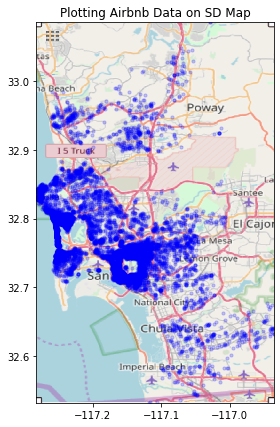

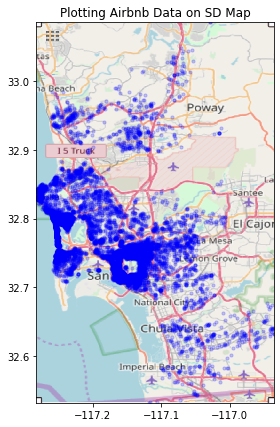

In [88]:
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(df.longitude, df.latitude, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Plotting Airbnb Data on SD Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(sd_m, zorder=0, extent = BBox, aspect= 'equal')
myLocator = mticker.MultipleLocator(.1)
ax.xaxis.set_major_locator(myLocator)

fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(df.longitude, df.latitude, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Plotting Airbnb Data on SD Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(sd_m, zorder=0, extent = BBox, aspect= 'equal')
myLocator = mticker.MultipleLocator(.1)
ax.xaxis.set_major_locator(myLocator)

In [89]:
df_zillow = pd.read_csv("City_Zhvi_AllHomesV2.csv")
df_zillow = df_zillow[ df_zillow['CountyName'] == 'San Diego County' ]
columns = df_zillow.columns.to_numpy()

for col in columns:
    year = col[0:4]
    if year < '2007':
        df_zillow = df_zillow.drop( columns = col, axis = 1)
df_zillow = df_zillow.drop( columns = ['RegionID', 'Metro', 'CountyName', 'State'], axis = 1)      
df_zillow = df_zillow.reset_index()
df_zillow = df_zillow.drop( columns = 'index', axis = 1 )
#df_zillow

In [90]:
#pd.set_option('display.max_rows', 1000)
df_zillow_rent = pd.read_csv("Neighborhood_Zri_AllHomesPlusMultifamily.csv")
df_zillow_rent = df_zillow_rent[df_zillow_rent['City'] == 'San Diego' ]
df_zillow_rent = df_zillow_rent.drop(columns = ['RegionID', 'Metro', 'CountyName', 'State', 'CountyName', 'City'], axis = 1)
df_zillow_rent = df_zillow_rent.reset_index()
df_zillow_rent = df_zillow_rent.drop(columns = 'index', axis = 1 )
df_zillow_rent = df_zillow_rent.drop(df_zillow_rent.iloc[:,2:6], axis = 1)
for i in range(3, 20):
    df_zillow_rent = df_zillow_rent.drop(df_zillow_rent.iloc[:,i:i+5], axis = 1)
df_zillow_rent = df_zillow_rent.drop(df_zillow_rent.iloc[:,18:], axis = 1)
df_zillow_rent = df_zillow_rent.drop(columns = ['SizeRank'])
df_zillow_rent = df_zillow_rent.sort_values('RegionName')
df_zillow_rent = df_zillow_rent.reset_index()
df_zillow_rent = df_zillow_rent.drop(columns = 'index', axis = 1 )
df_zillow_rent

,RegionName,2011-01,2011-07,2012-01,2012-07,2013-01,2013-07,2014-01,2014-07,2015-01,2015-07,2016-01,2016-07,2017-01,2017-07,2018-01,2018-07
0,Adams North,1723.0,1714.0,1749.0,1719.0,1711.0,1749.0,1834.0,1857.0,2000.0,2111.0,2181.0,2186.0,2220.0,2280.0,2284.0,2291.0
1,Allied Gardens,1622.0,1629.0,1651.0,1668.0,1723.0,1735.0,1741.0,1743.0,1787.0,1864.0,1931.0,1973.0,1965.0,2014.0,2048.0,2115.0
2,Bankers Hill,2378.0,2385.0,2361.0,2338.0,2395.0,2451.0,2531.0,2551.0,2639.0,2642.0,2733.0,2763.0,2768.0,2815.0,2806.0,2832.0
3,Bay Ho,2205.0,2136.0,2072.0,2035.0,2057.0,2109.0,2204.0,2251.0,2351.0,2397.0,2441.0,2502.0,2461.0,2489.0,2459.0,2481.0
4,Bay Park,2145.0,2121.0,2093.0,2078.0,2059.0,2115.0,2191.0,2217.0,2312.0,2334.0,2421.0,2460.0,2469.0,2532.0,2499.0,2533.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,Tierrasanta,2044.0,2064.0,2051.0,2048.0,2043.0,2085.0,2121.0,2095.0,2190.0,2261.0,2308.0,2372.0,2340.0,2379.0,2381.0,2460.0
76,Torrey Highlands,NaN,NaN,NaN,2946.0,NaN,3029.0,3063.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3051.0
77,University City,2038.0,2032.0,2020.0,2038.0,2046.0,2081.0,2168.0,2209.0,2328.0,2335.0,2426.0,2485.0,2490.0,2528.0,2519.0,2583.0
78,University Heights,1764.0,1726.0,1724.0,1714.0,1735.0,1777.0,1822.0,1859.0,1934.0,2035.0,2077.0,2099.0,2128.0,2179.0,2183.0,2193.0


Adams North
Allied Gardens
Bankers Hill
Bay Ho
Bay Park
Bay Terraces
Carmel Mountain
Carmel Valley
Castle
Clairemont Mesa East
Clairemont Mesa West
Colina del Sol
College East
College West
Core-Columbia
Corridor
Cortez Hill
Del Cerro
Del Mar Heights
Egger Highlands
El Cerrito
Emerald Hills
Encanto
Golden Hill
Grantville
Hillcrest
Jomacha-Lomita
Kearny Mesa
Kensington
La Jolla
La Playa
Lake Murray
Lincoln Park
Linda Vista
Little Italy
Logan Heights
Loma Portal
Marina
Midtown
Mira Mesa
Miramar Ranch North
Mission Bay Park
Mission Beach
Mission Hills
Mission Valley East
Mission Valley West
Morena
Mountain View
Nestor
Normal Heights
North City
North Clairemont
North Park
Oak Park
Ocean Beach
Ocean Crest
Otay Mesa West
Pacific Beach
Paradise Hills
Point Loma Heights
Rancho Bernardo
Rancho Penasquitos
Redwood Village
Ridgeview-Webster
Rolando
Rolando Park
Roseville - Fleet Ridge
San Carlos
San Ysidro
Scripps Ranch
Serra Mesa
Skyline
Sorrento Valley
South Park
Talmadge
Tierrasanta
Torrey High

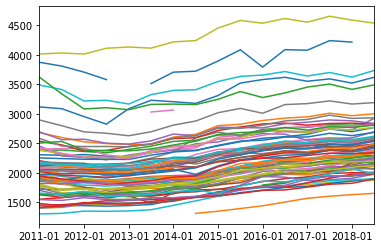

In [91]:
for i in range(0, 80):
    city = df_zillow_rent.loc[i, :].squeeze()
    print(city[0])
    city.iloc[1:].plot()
    #plt.show()

In [92]:
df_2014_A = pd.read_csv("AirBnb Data/airbnb_san_diego_2014-05-25.csv")
df_2014_A = df_2014_A.drop(df_2014_A.iloc[:,10:], axis = 1)
df_2014_A = df_2014_A.drop(df_2014_A.iloc[:,0:4], axis = 1)
df_2014_A = df_2014_A.drop(df_2014_A.iloc[:,1:5], axis = 1)
df_2014_A = df_2014_A.groupby(['neighborhood']).mean()
df_2014_A = df_2014_A.reset_index()
df_2014_A = df_2014_A.rename(columns={"neighborhood": "RegionName"})
df_2014_A = df_2014_A.rename(columns={"price": "2014-A"})
#df_2014_A

In [93]:
df_2014_B = pd.read_csv("AirBnb Data/airbnb_san_diego_2014-11-03.csv")
df_2014_B = df_2014_B.drop(df_2014_B.iloc[:,10:], axis = 1)
df_2014_B = df_2014_B.drop(df_2014_B.iloc[:,0:4], axis = 1)
df_2014_B = df_2014_B.drop(df_2014_B.iloc[:,1:5], axis = 1)
df_2014_B = df_2014_B.groupby(['neighborhood']).mean()
df_2014_B = df_2014_B.reset_index()
df_2014_B = df_2014_B.rename(columns={"neighborhood": "RegionName"})
df_2014_B = df_2014_B.rename(columns={"price": "2014-B"})
#df_2014_B

In [94]:
df_2015_A = pd.read_csv("AirBnb Data/airbnb_san_diego_2015-08-22.csv")
df_2015_A = df_2015_A.drop(df_2015_A.iloc[:,10:], axis = 1)
df_2015_A = df_2015_A.drop(df_2015_A.iloc[:,0:4], axis = 1)
df_2015_A = df_2015_A.drop(df_2015_A.iloc[:,1:5], axis = 1)
df_2015_A = df_2015_A.groupby(['neighborhood']).mean()
df_2015_A = df_2015_A.reset_index()
df_2015_A = df_2015_A.rename(columns={"neighborhood": "RegionName"})
df_2015_A = df_2015_A.rename(columns={"price": "2015-A"})
#df_2015_A

In [95]:
df_2015_B = pd.read_csv("AirBnb Data/airbnb_san_diego_2015-10-23.csv")
df_2015_B = df_2015_B.drop(df_2015_B.iloc[:,10:], axis = 1)
df_2015_B = df_2015_B.drop(df_2015_B.iloc[:,0:4], axis = 1)
df_2015_B = df_2015_B.drop(df_2015_B.iloc[:,1:5], axis = 1)
df_2015_B = df_2015_B.groupby(['neighborhood']).mean()
df_2015_B = df_2015_B.reset_index()
df_2015_B = df_2015_B.rename(columns={"neighborhood": "RegionName"})
df_2015_B = df_2015_B.rename(columns={"price": "2015-B"})
#df_2015_B

In [96]:
df_2016_A = pd.read_csv("AirBnb Data/airbnb_san_diego_2016-01-19.csv")
df_2016_A = df_2016_A.drop(df_2016_A.iloc[:,10:], axis = 1)
df_2016_A = df_2016_A.drop(df_2016_A.iloc[:,0:4], axis = 1)
df_2016_A = df_2016_A.drop(df_2016_A.iloc[:,1:5], axis = 1)
df_2016_A = df_2016_A.groupby(['neighborhood']).mean()
df_2016_A = df_2016_A.reset_index()
df_2016_A = df_2016_A.rename(columns={"neighborhood": "RegionName"})
df_2016_A = df_2016_A.rename(columns={"price": "2016-A"})
#df_2016_A

In [97]:
df_2016_B = pd.read_csv("AirBnb Data/airbnb_san_diego_2016-07-19.csv")
df_2016_B = df_2016_B.drop(df_2016_B.iloc[:,10:], axis = 1)
df_2016_B = df_2016_B.drop(df_2016_B.iloc[:,0:4], axis = 1)
df_2016_B = df_2016_B.drop(df_2016_B.iloc[:,1:5], axis = 1)
df_2016_B = df_2016_B.groupby(['neighborhood']).mean()
df_2016_B = df_2016_B.reset_index()
df_2016_B = df_2016_B.rename(columns={"neighborhood": "RegionName"})
df_2016_B = df_2016_B.rename(columns={"price": "2016-B"})
#df_2016_B

In [98]:
df_2017_A = pd.read_csv("AirBnb Data/airbnb_san_diego_2016-01-19.csv")
df_2017_A = df_2017_A.drop(df_2017_A.iloc[:,10:], axis = 1)
df_2017_A = df_2017_A.drop(df_2017_A.iloc[:,0:4], axis = 1)
df_2017_A = df_2017_A.drop(df_2017_A.iloc[:,1:5], axis = 1)
df_2017_A = df_2017_A.groupby(['neighborhood']).mean()
df_2017_A = df_2017_A.reset_index()
df_2017_A = df_2017_A.rename(columns={"neighborhood": "RegionName"})
df_2017_A = df_2017_A.rename(columns={"price": "2017-A"})
#df_2017_A

In [99]:
df_2017_B = pd.read_csv("AirBnb Data/airbnb_san_diego_2016-07-19.csv")
df_2017_B = df_2017_B.drop(df_2017_B.iloc[:,10:], axis = 1)
df_2017_B = df_2017_B.drop(df_2017_B.iloc[:,0:4], axis = 1)
df_2017_B = df_2017_B.drop(df_2017_B.iloc[:,1:5], axis = 1)
df_2017_B = df_2017_B.groupby(['neighborhood']).mean()
df_2017_B = df_2017_B.reset_index()
df_2017_B = df_2017_B.rename(columns={"neighborhood": "RegionName"})
df_2017_B = df_2017_B.rename(columns={"price": "2017-B"})
#df_2017_B

In [100]:
df_airbnb = pd.DataFrame()
df_airbnb = df_airbnb.append(df_2014_A, ignore_index=True)
df_airbnb = df_airbnb.drop(columns = '2014-A', axis = 1 )
L = [None] * 66
df_airbnb['2011-A'] = pd.Series(L)
df_airbnb['2011-B'] = pd.Series(L)
df_airbnb['2012-A'] = pd.Series(L)
df_airbnb['2012-B'] = pd.Series(L)
df_airbnb['2013-A'] = pd.Series(L)
df_airbnb['2013-B'] = pd.Series(L)
df_airbnb['2014-A'] = df_2014_A['2014-A']
df_airbnb['2014-B'] = df_2014_B['2014-B']
df_airbnb['2015-A'] = df_2015_A['2015-A']
df_airbnb['2015-B'] = df_2015_B['2015-B']
df_airbnb['2016-A'] = df_2016_A['2016-A']
df_airbnb['2016-B'] = df_2016_B['2016-B']
df_airbnb['2017-A'] = df_2017_A['2017-A']
df_airbnb['2017-B'] = df_2017_B['2017-B']

In [107]:
df_zillow = pd.merge(df_zillow_rent, df_2014_A, on='RegionName')
df_zillow = pd.merge(df_zillow, df_2014_B, on='RegionName')
df_zillow = pd.merge(df_zillow, df_2015_A, on='RegionName')
df_zillow = pd.merge(df_zillow, df_2015_B, on='RegionName')
df_zillow = pd.merge(df_zillow, df_2016_A, on='RegionName')
df_zillow = pd.merge(df_zillow, df_2016_B, on='RegionName')
df_zillow = pd.merge(df_zillow, df_2017_A, on='RegionName')
df_zillow = pd.merge(df_zillow, df_2017_B, on='RegionName')
df_zillow_rent = df_zillow.drop(df_zillow.iloc[:,17:], axis = 1)
df_airbnb_2 = pd.DataFrame()
L = [None] * 32
df_airbnb_2['RegionName'] = df_zillow['RegionName']
df_airbnb_2['2011-A'] = pd.Series(L)
df_airbnb_2['2011-B'] = pd.Series(L)
df_airbnb_2['2012-A'] = pd.Series(L)
df_airbnb_2['2012-B'] = pd.Series(L)
df_airbnb_2['2013-A'] = pd.Series(L)
df_airbnb_2['2013-B'] = pd.Series(L)
df_airbnb_2 = pd.merge(df_airbnb_2, df_zillow.drop(df_zillow.iloc[:,1:17], axis = 1), on='RegionName')
df_airbnb_2

,RegionName,2011-A,2011-B,2012-A,2012-B,2013-A,2013-B,2014-A,2014-B,2015-A,2015-B,2016-A,2016-B,2017-A,2017-B
0,Bay Ho,None,None,None,None,None,None,182.857143,200.312500,114.764706,143.857143,141.076923,150.405405,141.076923,150.405405
1,Bay Park,None,None,None,None,None,None,145.960000,172.325000,232.458333,155.849057,159.241379,169.791667,159.241379,169.791667
2,Carmel Valley,None,None,None,None,None,None,220.640000,310.457143,265.615385,183.840000,178.781818,220.343750,178.781818,220.343750
3,Cortez Hill,None,None,None,None,None,None,163.869565,212.375000,214.155172,194.530303,172.301370,224.370787,172.301370,224.370787
4,Del Cerro,None,None,None,None,None,None,47.500000,59.500000,53.000000,49.000000,58.333333,181.333333,58.333333,181.333333
5,Del Mar Heights,None,None,None,None,None,None,259.700000,312.750000,309.031250,341.000000,334.200000,335.811321,334.200000,335.811321
6,Encanto,None,None,None,None,None,None,73.600000,58.750000,89.555556,91.666667,104.777778,87.181818,104.777778,87.181818
7,Grantville,None,None,None,None,None,None,102.444444,114.769231,112.291667,98.114286,89.150000,87.512821,89.150000,87.512821
8,Kearny Mesa,None,None,None,None,None,None,97.000000,70.888889,103.222222,77.000000,97.636364,163.062500,97.636364,163.062500
9,Kensington,None,None,None,None,None,None,218.100000,212.545455,215.466667,185.846154,182.892857,187.875000,182.892857,187.875000


Balboa Park


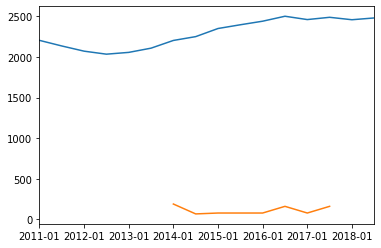

Bario Logan


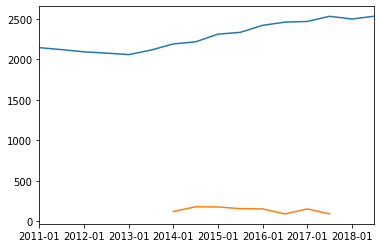

Bay Ho


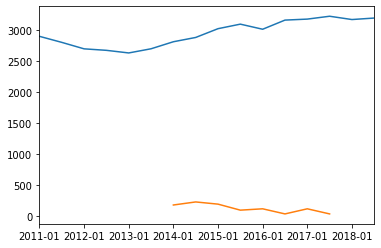

Bay Park


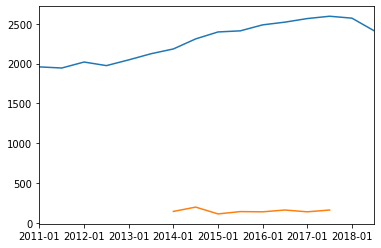

Bird Land


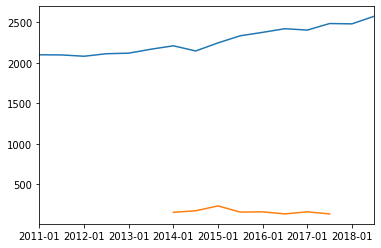

Carmel Valley


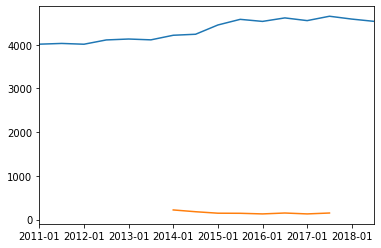

City Heights East


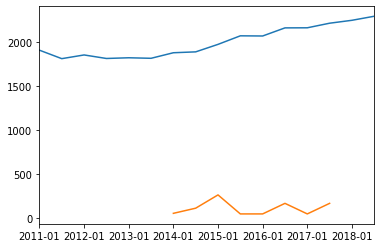

City Heights West


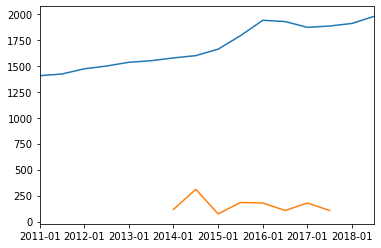

Clairemont Mesa


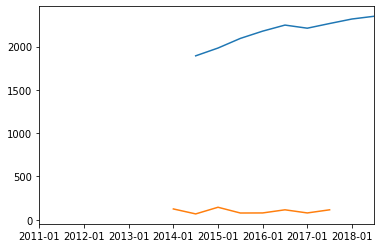

College Area


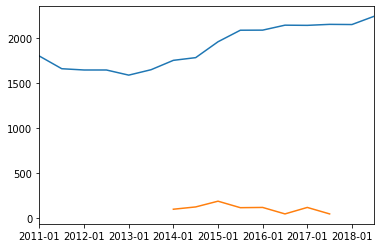

Columbia


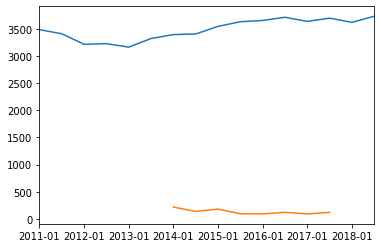

Core


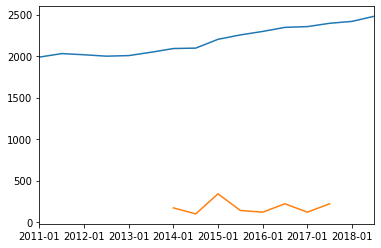

Cortez Hill


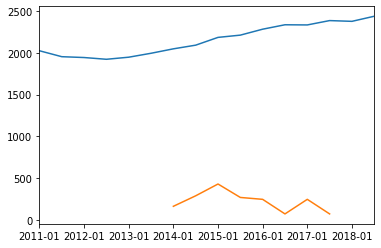

Darnall


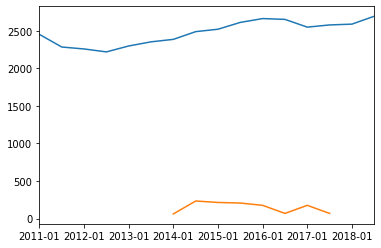

Del Cerro


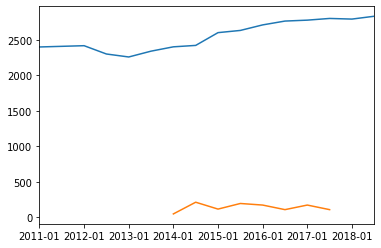

Del Mar Heights


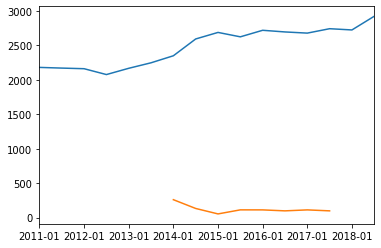

East Village


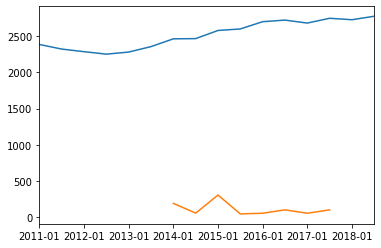

El Cerritos


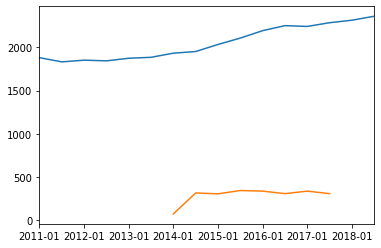

Encanto


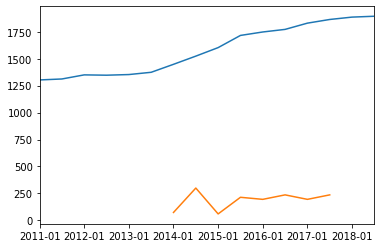

Gaslamp Quarter


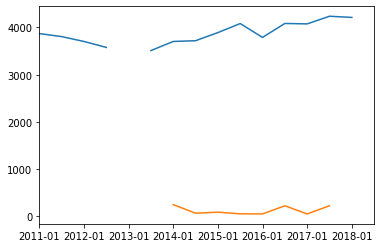

Gateway


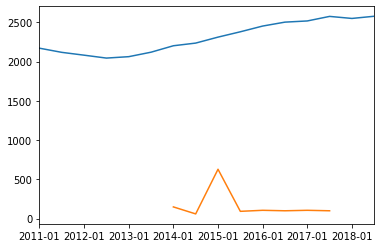

Grant Hill


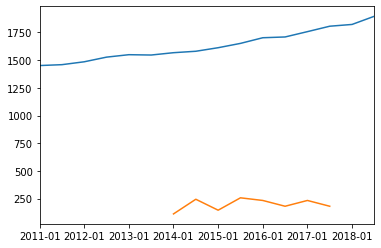

Grantville


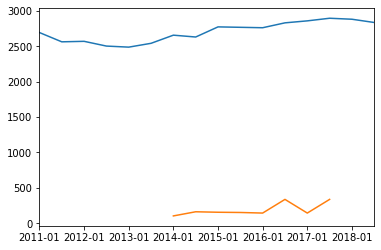

Horton Plaza


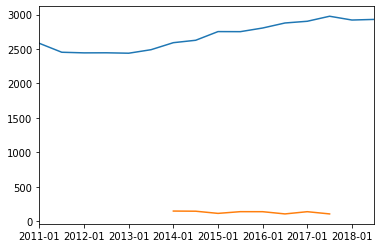

Kearny Mesa


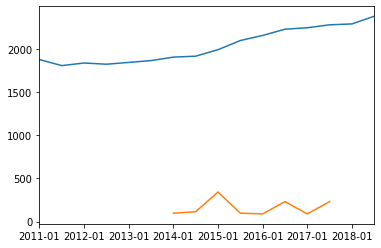

Kensington


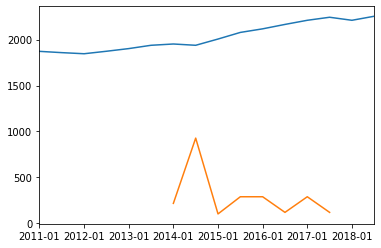

La Jolla


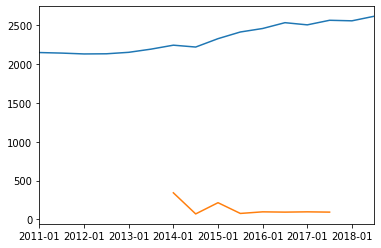

La Jolla Village


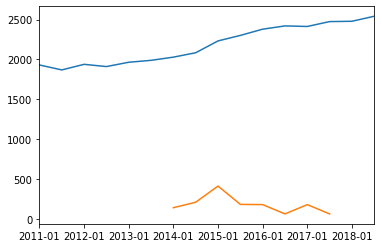

Lake Murray


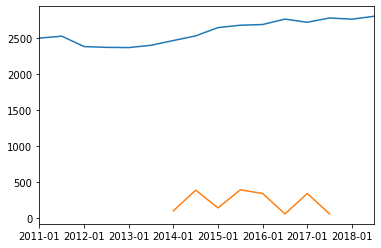

Linda Vista


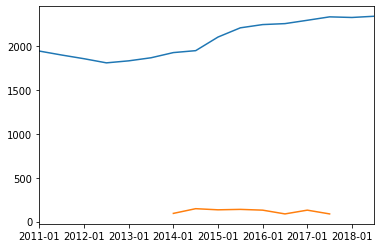

Little Italy


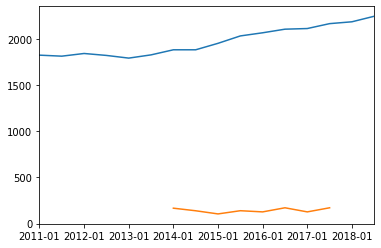

Loma Portal


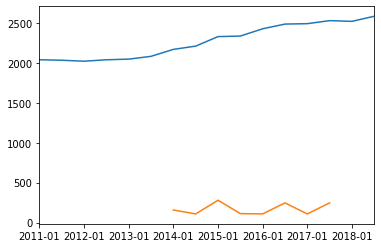

In [108]:
for i in range(0, 32):
    zillow = df_zillow_rent.loc[i, :].squeeze()
    airbnb = df_airbnb.loc[i, :].squeeze()
    print(airbnb[0])
    zillow.iloc[1:].plot()
    airbnb.iloc[1:].plot(use_index = False)
    plt.show()

# Data Analysis & Results
fsafsafsafsaf

# Ethics & Privacy

Yes the pricing data for hotels, Airbnb’s and apartments are all public so we have permission to use it and since the data is already public there are no privacy concerns. The dataset is raw data of prices and location of Airbnb’s in each city. We do not believe there are any potential privacy issues since all data collected is made public on multiple sites. That is true for both apartment prices and Airbnb prices. We also will not focus our analysis on specific addresses but on surrounding locations based on the locations of an Airbnb. If we were to be looking at how frequent the places were rented then there could be a bias on the way luxury rentals are promoted compared to lower quality rentals. The lower quality rentals could also then be only in primarily ethnic areas which then introduce a bias. However, we are not looking at that data so we avoid that potential bias.


# Conclusion & Discussion
Fill in your discussion information here


# Team Contributions
* John Joungseo Kim
    * fsfs
* Oscar Reyes
    * fsfs
* Hae-Chan Grace Kim
    * fsfs
* Edgar Matias
    * xcxx
* Aaron Hernandez
    * csfsf
